In [15]:
import matplotlib.pyplot as plt
from huffman_code import huffman_code
import numpy as np
from matplotlib.ticker import FormatStrFormatter

# Ejercicio 1

In [ ]:
def PMF(path:str) -> dict[str,float]:
    """
    Calculo de la frecuencia de aparición de cada uno de los caracteres que constituyen un texto

    Parametros:
    - path: str. Ruta al archivo a analizar

    Returns:
    dict[str,float]. Diccionario, ordenado de manera ascendente, cuyas claves son los caracteres y sus valores, la probabilidad de aparición correspondiente
    """
    with open (path,'r', encoding='utf-8') as f:
        texto = f.read()

    #Diccionario de conteo -> clase = palabra, valor = cantidad de apariciones
    apariciones = {}

    for elemento in texto:
        if elemento == '\n':
            continue
        if elemento in apariciones:
            apariciones[elemento] += 1
        else:
            apariciones[elemento] = 1
    
    #Diccionario de probabilidades -> clase = palabra, valor = probabilidad de aparición
    probabilidades = {}
    n = len(texto)
    for caracter,repeticiones in apariciones.items():
        #La probabilidad de aparición del caracter es la frecuencia relativa de aparición del mismo, es decir, la cantidad de apariciones sobre el total de elementos del texto
        probabilidades[caracter] = repeticiones / n
    
    #Devolución del diccionario de probabilidades, ordenadas de manera ascendente
    return dict(sorted(probabilidades.items(),key = lambda x: x[1], reverse = True))


In [ ]:
def graficos(probabilidades:dict[str,float],archivo:str):
    """
    Construcción de gráfico de barras que representa la probabilidad de aparición de los caracteres

    Argumentos:
    - probabilidades:diccionario con la probabilidad de aparición de cada caracter
    - archivo: str. Ruta al archivo a analizar
    """
    caracteres = list(probabilidades.keys())
    pmfs = list(probabilidades.values())

    #Gráfico de barras
    plt.figure(figsize= (10,5))
    plt.bar(caracteres,pmfs,color = 'green')    
    plt.title(f'Frecuencia estimada de aparición de caracteres en {archivo}')
    plt.xlabel('Caracter')
    plt.ylabel('p(x)')
    plt.yscale("log")
    plt.show()
    plt.show()

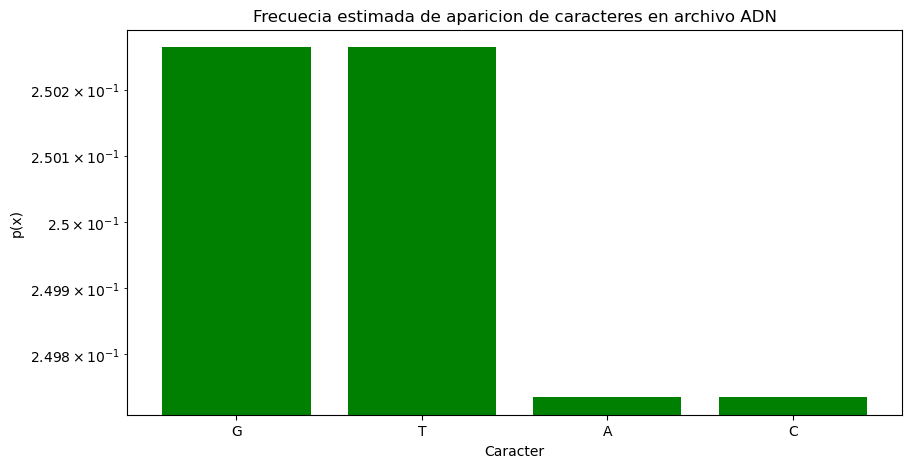

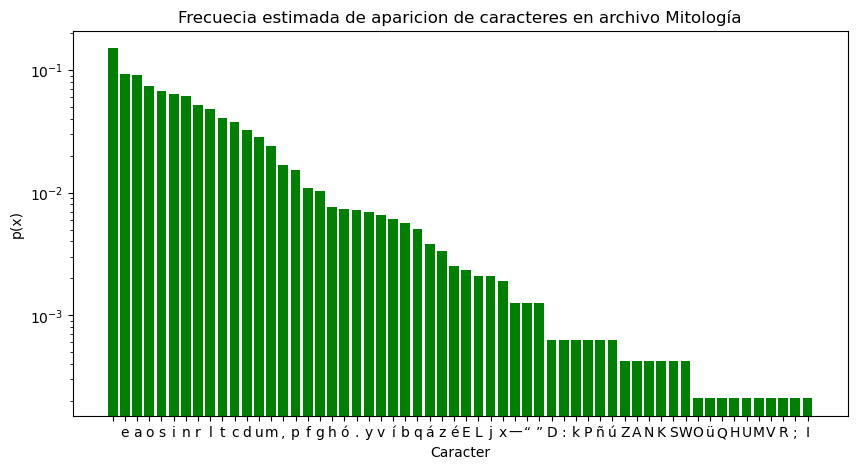

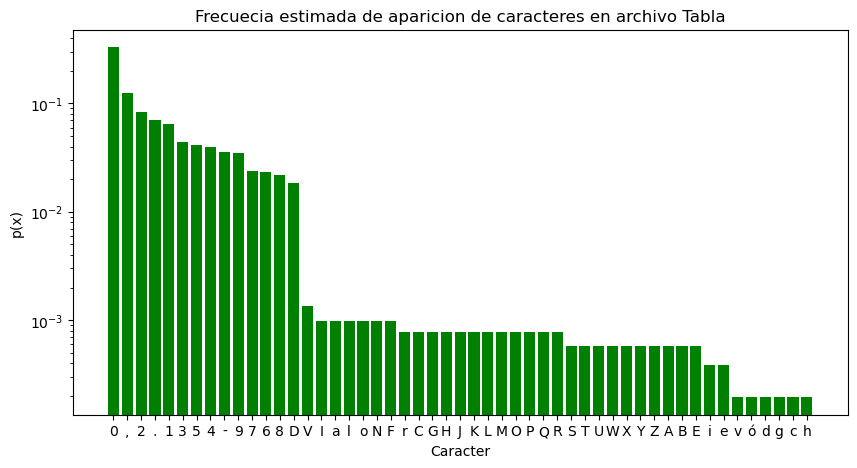

In [ ]:
if __name__ == "__main__":
    archivos = ["textos/adn.txt","textos/mitología.txt","textos/tabla.txt"]
    #Definición de nombres para los gráficos
    nombres = ["ADN","Mitología","Tabla"]
    probabilidades = [PMF(archivo) for archivo in archivos]
    
    for archivo in archivos:
        probabilidad = probabilidades[archivos.index(archivo)]
        graficos(probabilidad,"archivo " + nombres[archivos.index(archivo)])

# Ejercicio 2

In [ ]:
def huffman_texto(path:str,probabilidades:dict[str,float]) -> str:
    """
    Cálculo del código de Huffman del texto de interés.

    Argumentos:
    - path: str. Ruta al archivo
    - probabilidades: diccionario con la probabilidad de aparición de cada caracter

    Returns:
    - str. Cadena que representa el texto codificado a partir de lo propuesto por Huffman. 
    """
    #Apertura del archivo
    with open(path,'r') as f:
        texto = f.read()
    #Utilización de la función de Huffman provista para obtener el código de cada caracter
    huffman_caracter = huffman_code(probabilidades)
    #Obtención del texto codificado
    return ''.join([huffman_caracter[caracter] for caracter in texto])


In [ ]:
def L(probabilidades:dict[str,float]) -> float:
    """
    Cálculo de la longitud promedio de bits total del texto correspondiente a su codificación no uniforme 
    
    Argumentos:
    - probabilidades: diccionario con la probabilidad de aparición de cada caracter

    Returns:
    - suma: float. Suma total del promedio de bits utilizado por cada símbolo multiplicado por su frecuencia de aparición
    """
    #Calculo de la longitud promedio del código de Huffman
    huffman_caracter = huffman_code(probabilidades)
    suma = 0
    for caracter,frecuencia_aparicion in probabilidades.items():
        #L = Σ p(xi) * l(xi)
        suma += frecuencia_aparicion * len(huffman_caracter[caracter])
    return suma 

In [ ]:
def cantidad_bits(probabilidades:dict[str,float]) -> int:
    """
    Cálculo de la cantidad mínima de bits necesarios para representar los caracteres
    
    Argumentos:
    - probabilidades: diccionario con la probabilidad de aparición de cada caracter

    Returns:
    - L_uniforme: int. Cantidad mínima de bits para la representación de un caracter (al ser uniforme, este valor le corresponde a todos los caracteres)
    """
    N = len(probabilidades)
    #Utilizacion de .ceil para redondear hacia arriba
    L_uniforme = int(np.ceil(np.log2(N)))
    return L_uniforme

In [ ]:
def porcentaje_reduccion(L:int, L_uniforme:int) -> float:
    """
    Cálculo del porcentaje de memoria reducido al utiizar Huffman

    Arguments:
    - L: longitud promedio de bits total de un texto correspondiente a su codificación no uniforme 
    - L_uniforme: int. Cantidad mínima de bits para la representación de los caracteres de un texto 
    """
    return ((L_uniforme - L)/L_uniforme) * 100

In [23]:
if __name__ == "__main__":
    archivos = ["textos/adn.txt","textos/mitología.txt","textos/tabla.txt"]

    for archivo in archivos:
        L_promedio = L(probabilidades[archivos.index(archivo)])
        L_uniforme = cantidad_bits(probabilidades[archivos.index(archivo)])
        reduccion = porcentaje_reduccion(L_promedio, L_uniforme)
        
        print(f"ARCHIVO: {nombres[archivos.index(archivo)]}")
        print(f"Longitud promedio del código de Huffman: {L_promedio} bits/símbolo")
        print(f"Cantidad de bits necesarios para una representación uniforme: {L_uniforme} bits/símbolo")
        print(f"Porcentaje de reducción al usar código de Huffman: {reduccion} %")
        print("-----------------------------------------------------")

ARCHIVO: ADN
Longitud promedio del código de Huffman: 1.9999999999999998 bits/símbolo
Cantidad de bits necesarios para una representación uniforme: 2 bits/símbolo
Porcentaje de reducción al usar código de Huffman: 1.1102230246251565e-14 %
-----------------------------------------------------
ARCHIVO: Mitología
Longitud promedio del código de Huffman: 4.334175615919141 bits/símbolo
Cantidad de bits necesarios para una representación uniforme: 6 bits/símbolo
Porcentaje de reducción al usar código de Huffman: 27.763739734680986 %
-----------------------------------------------------
ARCHIVO: Tabla
Longitud promedio del código de Huffman: 3.4043917605907477 bits/símbolo
Cantidad de bits necesarios para una representación uniforme: 6 bits/símbolo
Porcentaje de reducción al usar código de Huffman: 43.26013732348754 %
-----------------------------------------------------


# Ejercicio 3

In [ ]:
def entropia(probabilidades:dict[str,float]) -> float:
    """
    Cálculo de la entropía de un texto

    Arguments:
    - probabilidades: diccionario con la probabilidad de aparición de cada caracter

    Returns:
    - H: float. Entropía total del texto
    """
    H = 0
    for _,frecuencia_aparicion in probabilidades.items():
        #H = - Σ p(xi) * log2(p(xi))
        H += frecuencia_aparicion * np.log2(frecuencia_aparicion)
    return -H

In [25]:
if __name__ == "__main__":
    entropias = [entropia(probabilidad) for probabilidad in probabilidades]
    for archivo in archivos:
        print(f"Entropía archivo {nombres[archivos.index(archivo)]}: {entropias[archivos.index(archivo)]} bits/símbolo")

Entropía archivo ADN: 1.999999192242485 bits/símbolo
Entropía archivo Mitología: 4.30530475085117 bits/símbolo
Entropía archivo Tabla: 3.377063133256595 bits/símbolo


# Ejercicio 4

In [ ]:
def entropia_normalizada(probabilidades: dict[str,float]) -> float:
    """
    Cálculo de la entropía normalizada de un texto mediante la formula H(x) / log2(N)

    Arguments:
    - probabilidades: diccionario con la probabilidad de aparición de cada caracter

    Returns:
    - float. La entropía normalizada, perteneciente al intervalo [0,1], de un texto
    """
    N = len(probabilidades)
    H = entropia(probabilidades)
    return H / np.log2(N)

In [ ]:
def grafico_entropia_normalizada(entropias_normalizadas: list[float], archivos: list[str]):
    """
    Construcción del gráfico de barras en el que se compara la entropía normalizada de los textos de interés

    Argumentos:
    - entropias_normalizadas: list[float]. Lista con al entropía normalizada de cada texto
    - archivos: list[str]. Lista con las rutas a los archivos de texto
    """
    plt.figure(figsize=(8,5))
    plt.bar(archivos, entropias_normalizadas, color='green',width = 0.5)
    plt.title('Entropía Normalizada de los Archivos')
    plt.xlabel('Archivo')
    plt.ylabel('Entropía Normalizada')
    plt.ylim(0, 1.01)
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.show()

Entropía normalizada archivo ADN: 0.9999995961212425 bits/símbolo
Entropía normalizada archivo Mitología: 0.7349468621410936 bits/símbolo
Entropía normalizada archivo Tabla: 0.5953473037836177 bits/símbolo


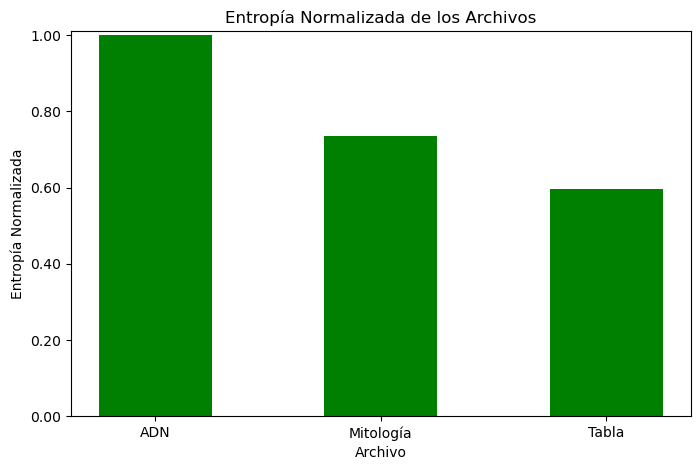

In [28]:
if __name__ == "__main__":
    entropias_normalizadas = [entropia_normalizada(probabilidad) for probabilidad in probabilidades]
    for archivo in archivos:
        print(f"Entropía normalizada archivo {nombres[archivos.index(archivo)]}: {entropias_normalizadas[archivos.index(archivo)]} bits/símbolo")
    grafico_entropia_normalizada(entropias_normalizadas, nombres)